# _Linear Regression Lab 4 — Kevin Wong_#

In [1]:
%load_ext rpy2.ipython
import rpy2.rinterface 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="whitegrid")

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
import scipy.stats as stats
from scipy.stats import t as tdist

/Users/kevinwong2014/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


** Dataset Context **

The forestry dataset records the needle area and several other variables for 35 coniferous trees. Specifically, the dataset contains observations from the following variables:
- area: the total needle area of the tree
- height: the height of the tree
- caliper: a measure of the tree’s trunk size
- htcal: the product of height and caliper (a measure of the tree’s trunk volume)

Interest lies developing a model that relates a tree’s total needle area to its caliper and its
height.

**Importing Data in Python and R**

In [2]:
df = pd.read_csv("forestry.csv") 
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
area       35 non-null float64
height     35 non-null float64
caliper    35 non-null float64
htcal      35 non-null float64
dtypes: float64(4)
memory usage: 1.2 KB


In [3]:
df.head(10)

,area,height,caliper,htcal
0,101.51,36.5,1.10,40.150
1,79.54,33.0,1.00,33.000
2,20.62,22.0,0.30,6.600
3,53.07,26.0,0.50,13.000
4,43.02,24.0,0.50,12.000
5,31.88,24.0,0.40,9.600
6,26.78,21.0,0.40,8.400
7,29.93,26.0,0.40,10.400
8,18.90,16.5,0.36,5.940
9,54.30,34.5,0.89,30.705


In [4]:
%%R

df <- read.csv("forestry.csv", header = T)
df[1:10,]

     area height caliper  htcal
1  101.51   36.5    1.10 40.150
2   79.54   33.0    1.00 33.000
3   20.62   22.0    0.30  6.600
4   53.07   26.0    0.50 13.000
5   43.02   24.0    0.50 12.000
6   31.88   24.0    0.40  9.600
7   26.78   21.0    0.40  8.400
8   29.93   26.0    0.40 10.400
9   18.90   16.5    0.36  5.940
10  54.30   34.5    0.89 30.705


---
** A) Fit a multiple linear regression model relating area to the three explanatory
variables listed above and construct the following residual plots: ** 
- Studentized Residuals vs. Index
- Studentized Residuals vs. Fitted Values
- Histogram of Studentized Residuals
- QQ-plot of Studentized Residuals

In [5]:
# First, we fit our models. 
model = smf.ols("area ~ height + caliper + htcal", data = df).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     74.14
Date:                Wed, 31 Oct 2018   Prob (F-statistic):           3.08e-14
Time:                        00:27:18   Log-Likelihood:                -153.77
No. Observations:                  35   AIC:                             315.5
Df Residuals:                      31   BIC:                             321.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.1765     55.096     -0.602      0.5

In [6]:
%%R
# Same process in R. 
model <- lm(area ~ height + caliper + htcal, data = df)
summary(model)


Call:
lm(formula = area ~ height + caliper + htcal, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.034  -9.353  -1.396   8.219  65.281 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -33.177     55.096  -0.602   0.5514  
height         3.735      1.952   1.914   0.0649 .
caliper      -74.117    114.012  -0.650   0.5204  
htcal          2.234      3.539   0.631   0.5324  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.81 on 31 degrees of freedom
Multiple R-squared:  0.8777,	Adjusted R-squared:  0.8658 
F-statistic: 74.14 on 3 and 31 DF,  p-value: 3.078e-14



In [7]:
 # Calculating the'Studentized' Residuals vector
n = len(df)
sigma_hat = np.sqrt(model.scale) # sigma-hat
X = np.array([np.repeat(1,n),df["height"],df["caliper"],df["htcal"]]).transpose() # X matrix
H = np.matmul(np.matmul(X, np.linalg.inv(np.matmul(X.transpose(), X))), X.transpose()) # Hat matrix
h = np.diag(H) # diagonal elements of H
st_resid = model.resid/(sigma_hat*np.sqrt(1-h))

In [8]:
%%R
n <- dim(df)[1]
sigma_hat <- summary(model)$sigma # sigma-hat
X <- cbind(rep(1, n), df$height, df$caliper, df$htcal) # X matrix
H <- X %*% solve(t(X) %*% X) %*% t(X) # Hat matrix
h <- diag(H) # diagonal elements of H
st_resid <- model$residuals/(sigma_hat*sqrt(1-h)) # 'Studentized' Residuals

**Plotting Studentized Residuals vs. Index**

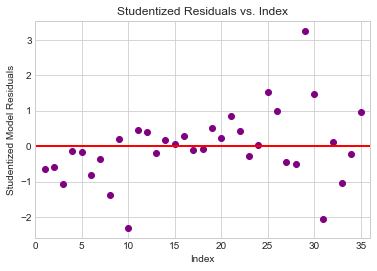

In [9]:
index = np.linspace(1,n,n)
plt.scatter(x = index, y = st_resid, color = "purple")
plt.xlabel("Index")
plt.ylabel("Studentized Model Residuals")
plt.title("Studentized Residuals vs. Index")
plt.hlines(y = 0, xmin = 0, xmax = n+1, color = "red", linewidth = 2)
plt.xlim(0,n+1)
plt.show()

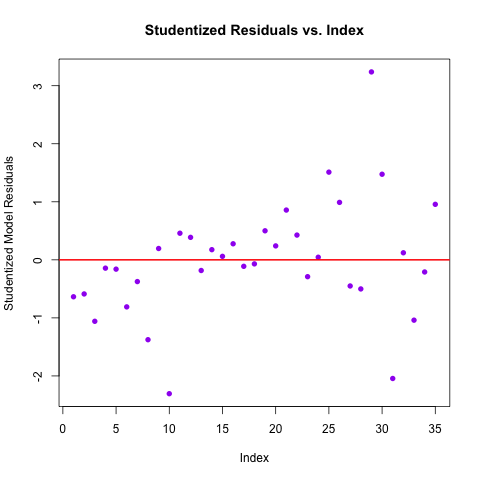

In [10]:
%%R
n <- length(model$residuals)
index <- 1:n
plot(x = index, y = st_resid, col = "purple", pch = 16, xlab = "Index", ylab = "Studentized Model Residuals", main = "Studentized Residuals vs. Index")
abline(h = 0, col = "red", lwd = 2)

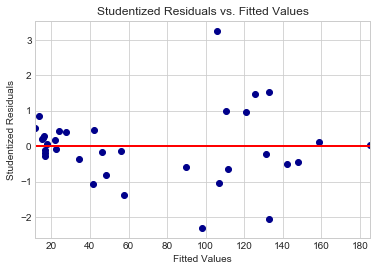

In [11]:
plt.scatter(x = model.fittedvalues, y = st_resid, color = "darkblue")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals")
plt.title("Studentized Residuals vs. Fitted Values")
plt.hlines(y = 0, xmin = np.min(model.fittedvalues), xmax = np.max(model.fittedvalues), color = "red", linewidth = 2)
plt.xlim(np.min(model.fittedvalues), np.max(model.fittedvalues))
plt.show()

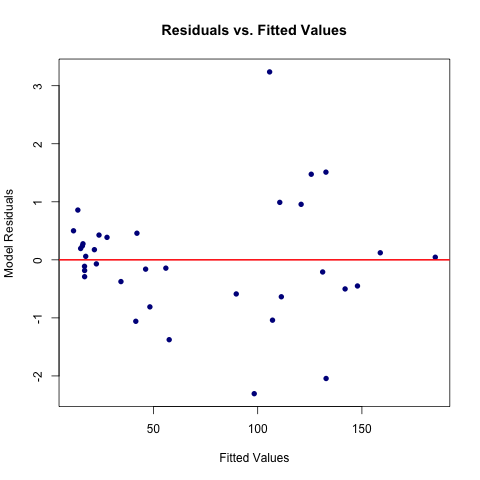

In [12]:
%%R
plot(x = model$fitted.values, y = st_resid, col = "darkblue", pch = 16, xlab = "Fitted Values", ylab = "Model Residuals", main = "Residuals vs. Fitted Values")
abline(h = 0, col = "red", lwd = 2)

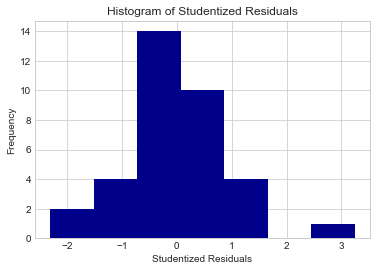

In [13]:
plt.hist(st_resid, color = "darkblue", bins=7)
plt.xlabel("Studentized Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Studentized Residuals")
plt.show()

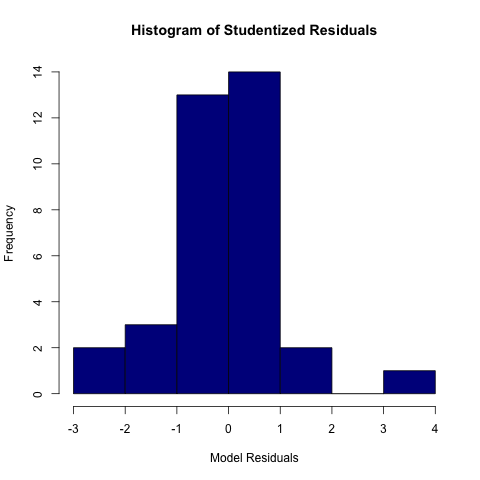

In [14]:
%%R
hist(st_resid, xlab = "Model Residuals", main = "Histogram of Studentized Residuals", col = "darkblue")

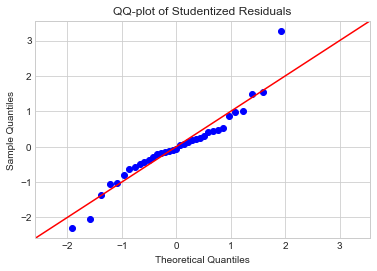

In [15]:
sm.qqplot(st_resid, stats.norm, fit = True, line = '45')
plt.title("QQ-plot of Studentized Residuals")
plt.show()

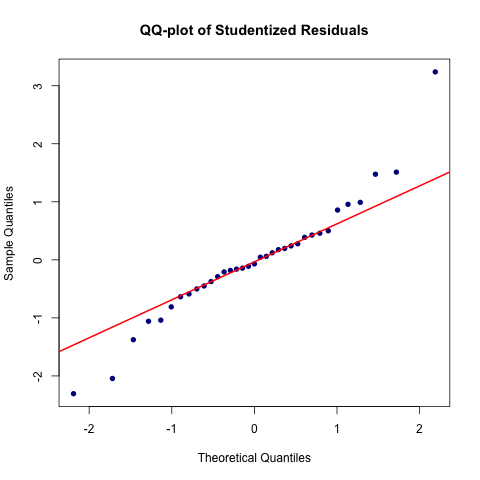

In [16]:
%%R
qqnorm(st_resid, pch = 16, main = "QQ-plot of Studentized Residuals", col = "darkblue")
qqline(st_resid, col = "red", lwd = 2)

---
** B) Based on the plots in part A, answer “Yes” or “No” to the following questions and
give a one sentence justification: **

<b><i>Do the residuals appear to be independent? </b></i><br>
No as the residuals vs. index graph appears to fan out at the ends and doesn't remain constant over all values.  However, n = 35 is a relatively small size dataset, and having more sample observations would be able to better indicate this. 

<b><i>Do the residuals appear to have constant variance?</b></i><br>
No, the variance is much higher in the mid-range of fitted values.

<b><i>Do the residuals appear to be normally distributed? </b></i><br>
No, as the QQ plot of residuals suggests a wider than normal, or heavy-tailed distribution.

<b><i>Do the residuals suggest the existence of an outlier?</b></i><br>
Yes, as there are several large values of residuals that are outside the range of a standard normal distribution.

---
**C) Which observation has the largest Studentized residual? ** 

In [17]:
# Index 28 has the largest studentized residual
print("Max Residual: ", max(model.resid), "\nCorresponding Studentized Residual: ", max(st_resid))
print(np.where(st_resid == max(st_resid)))

Max Residual:  65.2808386283 
Corresponding Studentized Residual:  3.23774384553
(array([28]),)


---
**D) Calculate the leverage for each observation and construct a plot of them vs. their
index. Which observations have high leverage (i.e., leverage larger than twice
the average leverage)?**

In [18]:
leverages = h
leverages

array([ 0.44838774,  0.30870904,  0.10045117,  0.07821682,  0.07614714,
        0.05467466,  0.04703267,  0.07039175,  0.10129502,  0.15782718,
        0.06101001,  0.06332837,  0.08475604,  0.10160375,  0.05851252,
        0.14058356,  0.17481524,  0.07363143,  0.08240691,  0.06658612,
        0.07138849,  0.05336468,  0.08475604,  0.28433074,  0.07381084,
        0.06590437,  0.10324293,  0.09233541,  0.06103058,  0.08810671,
        0.12357671,  0.25651243,  0.13581279,  0.08286254,  0.0725976 ])

In [19]:
%%R
leverages <- h
leverages

 [1] 0.44838774 0.30870904 0.10045117 0.07821682 0.07614714 0.05467466
 [7] 0.04703267 0.07039175 0.10129502 0.15782718 0.06101001 0.06332837
[13] 0.08475604 0.10160375 0.05851252 0.14058356 0.17481524 0.07363143
[19] 0.08240691 0.06658612 0.07138849 0.05336468 0.08475604 0.28433074
[25] 0.07381084 0.06590437 0.10324293 0.09233541 0.06103058 0.08810671
[31] 0.12357671 0.25651243 0.13581279 0.08286254 0.07259760


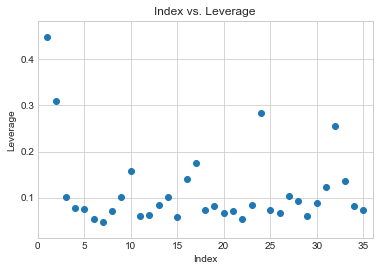

In [20]:
plt.scatter(x = index, y = leverages)
plt.xlim(0,n+1)
plt.ylabel("Leverage")
plt.xlabel("Index")
plt.title("Index vs. Leverage")
plt.show()

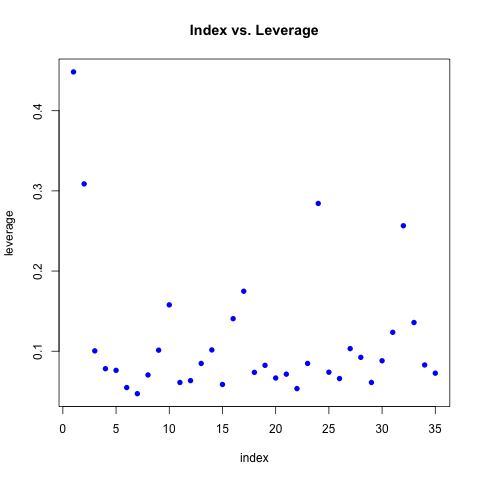

In [21]:
%%R
plot(x = index, y = leverages, col = "blue", pch = 16, main="Index vs. Leverage", ylab="leverage")

In [22]:
# Observations that have more than twice the average leverage, aka "high leverage" observations.
np.where(leverages > 2*np.mean(leverages))[0]

array([ 0,  1, 23, 31])

In [23]:
print(np.mean(leverages))

0.114285714286


In [24]:
%%R
paste("Index", which(leverages > 2*mean(leverages)), ":", leverages[which(leverages > 2*mean(leverages))])

[1] "Index 1 : 0.448387736135926"  "Index 2 : 0.308709036368603" 
[3] "Index 24 : 0.284330739389439" "Index 32 : 0.256512426659282"


---
** E) Calculate Cook’s D-statistic for each observation and construct a plot of them vs. their index. List the top three most influential points.**

In [25]:
d = model.resid/(sigma_hat*np.sqrt(1-h))
p = len(model.params) - 1
D = (h*d**2)/((1-h)*(p+1))

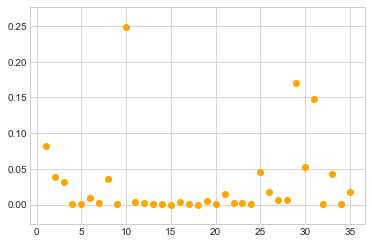

In [26]:
plt.scatter(x = index, y = D, color = "orange")
plt.show()

In [27]:
# top 3 points
for i, d in enumerate(D):
    if d in np.sort(D)[-3:]:
        print("Index", i, ":", d)

Index 9 : 0.249146183732
Index 28 : 0.170341722843
Index 30 : 0.147297535185


In [28]:
%%R 
p <- length(model$coefficients) - 1
D <- (h*st_resid^2)/((1-h)*(p+1))

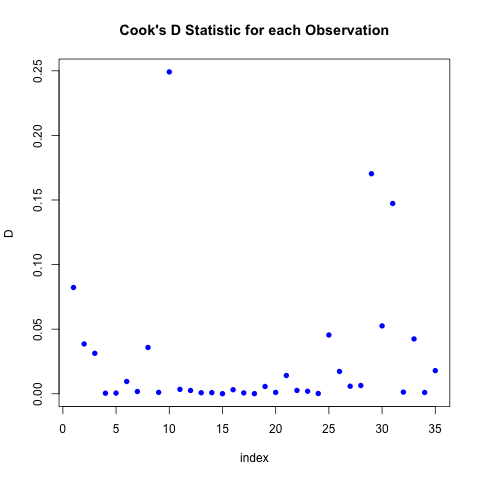

In [29]:
%%R
plot(x = index, y = D, col="blue", pch=16, main="Cook's D Statistic for each Observation")

In [30]:
%%R
sort(D, decreasing=TRUE)[0:3]

       10        29        31 
0.2491462 0.1703417 0.1472975 


---
**F) Repeat part A but with observations 10 and 29 deleted.**

In [31]:
df_new = df.drop([9,28])

model_new = smf.ols("area ~ height + caliper + htcal", data = df_new).fit()
summary_new = model_new.summary()
print(summary_new)

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 31 Oct 2018   Prob (F-statistic):           9.59e-17
Time:                        00:27:21   Log-Likelihood:                -135.33
No. Observations:                  33   AIC:                             278.7
Df Residuals:                      29   BIC:                             284.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.6149     41.883     -0.516      0.6

In [32]:
%%R
df_new <- df[c(-10, -29),]

model_new <- lm(area ~ height + caliper + htcal, data = df_new)
summary(model_new)


Call:
lm(formula = area ~ height + caliper + htcal, data = df_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.810  -6.979  -1.047   8.087  32.326 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -21.615     41.883  -0.516   0.6097  
height         3.018      1.474   2.048   0.0497 *
caliper      -86.238     87.225  -0.989   0.3310  
htcal          3.106      2.676   1.161   0.2553  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.59 on 29 degrees of freedom
Multiple R-squared:  0.9289,	Adjusted R-squared:  0.9215 
F-statistic: 126.3 on 3 and 29 DF,  p-value: < 2.2e-16



In [33]:
 # Calculating the'Studentized' Residuals vector
n_new = len(df_new)
sigma_hat_new = np.sqrt(model_new.scale) # sigma-hat
X_new = np.array([np.repeat(1,n_new),df_new["height"],df_new["caliper"],df_new["htcal"]]).transpose() # X matrix
H_new = np.matmul(np.matmul(X_new, np.linalg.inv(np.matmul(X_new.transpose(), X_new))), X_new.transpose()) # Hat matrix
h_new = np.diag(H_new) # diagonal elements of H
st_resid_new = model_new.resid/(sigma_hat_new*np.sqrt(1-h_new))

In [34]:
%%R
n_new <- dim(df_new)[1]
sigma_hat_new <- summary(model_new)$sigma # sigma-hat
X_new <- cbind(rep(1, n_new), df_new$height, df_new$caliper, df_new$htcal) # X matrix
H_new <- X_new %*% solve(t(X_new) %*% X_new) %*% t(X_new) # Hat matrix
h_new <- diag(H_new) # diagonal elements of H
st_resid_new <- model_new$residuals/(sigma_hat_new*sqrt(1-h_new)) # 'Studentized' Residuals

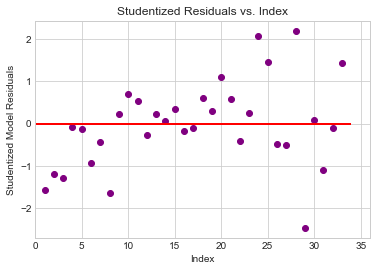

In [35]:
index_new = np.linspace(1,n_new,n_new)
plt.scatter(x = index_new, y = st_resid_new, color = "purple")
plt.xlabel("Index")
plt.ylabel("Studentized Model Residuals")
plt.title("Studentized Residuals vs. Index")
plt.hlines(y = 0, xmin = 0, xmax = n_new+1, color = "red", linewidth = 2)
plt.xlim(0,n+1)
plt.show()

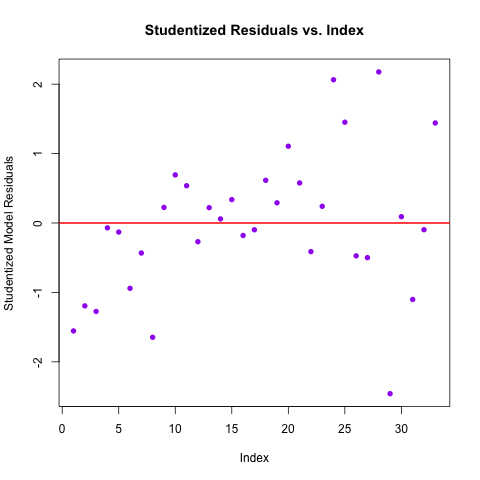

In [36]:
%%R
n_new <- length(model_new$residuals)
index_new <- 1:n_new
plot(x = index_new, y = st_resid_new, col = "purple", pch = 16, xlab = "Index", ylab = "Studentized Model Residuals", main = "Studentized Residuals vs. Index")
abline(h = 0, col = "red", lwd = 2)

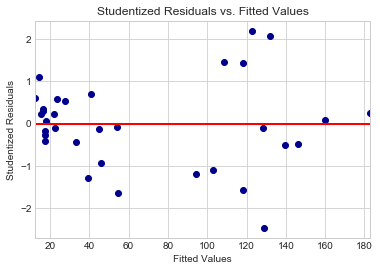

In [37]:
plt.scatter(x = model_new.fittedvalues, y = st_resid_new, color = "darkblue")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals")
plt.title("Studentized Residuals vs. Fitted Values")
plt.hlines(y = 0, xmin = np.min(model_new.fittedvalues), xmax = np.max(model_new.fittedvalues), color = "red", linewidth = 2)
plt.xlim(np.min(model_new.fittedvalues), np.max(model_new.fittedvalues))
plt.show()

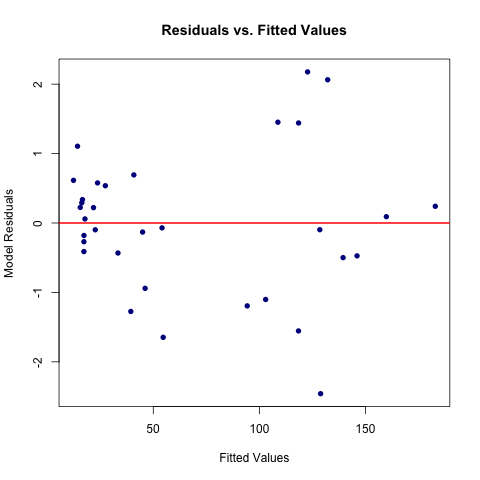

In [38]:
%%R
plot(x = model_new$fitted.values, y = st_resid_new, col = "darkblue", pch = 16, xlab = "Fitted Values", ylab = "Model Residuals", main = "Residuals vs. Fitted Values")
abline(h = 0, col = "red", lwd = 2)

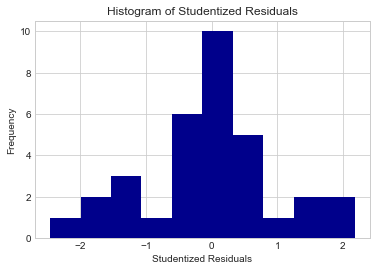

In [39]:
plt.hist(st_resid_new, color = "darkblue")
plt.xlabel("Studentized Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Studentized Residuals")
plt.show()

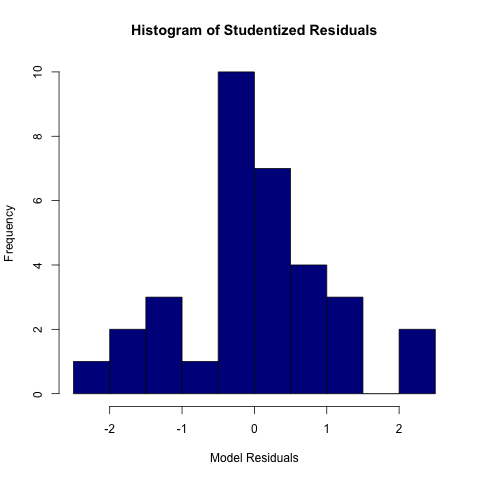

In [40]:
%%R
hist(st_resid_new, xlab = "Model Residuals", main = "Histogram of Studentized Residuals", col = "darkblue")

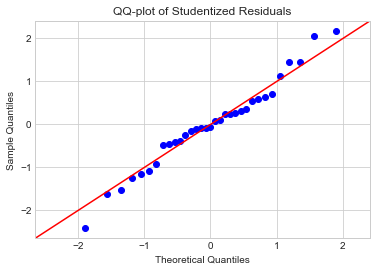

In [41]:
sm.qqplot(st_resid_new, stats.norm, fit = True, line = '45')
plt.title("QQ-plot of Studentized Residuals")
plt.show()

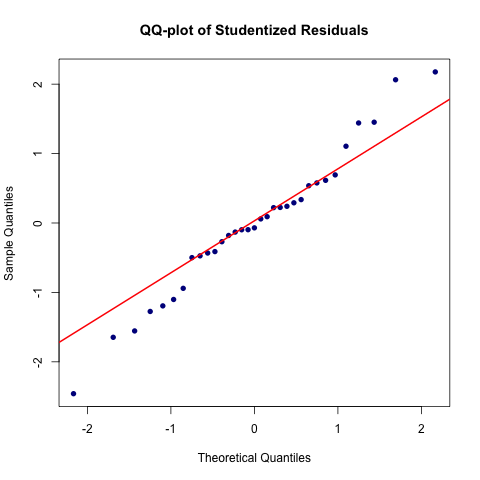

In [42]:
%%R
qqnorm(st_resid_new, pch = 16, main = "QQ-plot of Studentized Residuals", col = "darkblue")
qqline(st_resid_new, col = "red", lwd = 2)

---

** G) Consider the plot of the Studentized Residuals vs. Fitted Values from F. Do
these residuals appear to have constant variance? **

No.  Even though we dropped the two most extreme outliers as determined by Cook's D statistic, the residuals do not appear to be constant in the graph.  The lower-end of fitted values appear to have less variation than medium or large fitted values. 

---
** H) Fit a multiple linear regression model relating log(area) (i.e., the natural
logarithm of area) to the three explanatory variables, excluding observations 10
and 29 as you did in F. **

In [43]:
y_log = np.log(df_new["area"])

model_new = smf.ols("y_log ~ height + caliper + htcal", data = df_new).fit()
summary_new = model_new.summary()
print(summary_new)

                            OLS Regression Results                            
Dep. Variable:                  y_log   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 31 Oct 2018   Prob (F-statistic):           1.37e-17
Time:                        00:27:23   Log-Likelihood:                 3.6540
No. Observations:                  33   AIC:                            0.6920
Df Residuals:                      29   BIC:                             6.678
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1716      0.621     -0.276      0.7

In [44]:
%%R
y_log <- log(df_new$area)

model_new <- lm(y_log ~ height + caliper + htcal, data = df_new)
summary(model_new)


Call:
lm(formula = y_log ~ height + caliper + htcal, data = df_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48919 -0.13607 -0.01552  0.20216  0.34939 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.17160    0.62082  -0.276  0.78419    
height       0.12796    0.02185   5.857 2.36e-06 ***
caliper      4.39611    1.29291   3.400  0.00198 ** 
htcal       -0.11557    0.03967  -2.913  0.00682 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2311 on 29 degrees of freedom
Multiple R-squared:  0.9379,	Adjusted R-squared:  0.9314 
F-statistic: 145.9 on 3 and 29 DF,  p-value: < 2.2e-16



---
**I) Construct a plot of the Studentized Residuals vs. Fitted Values for the model in
H. Does it appear as though the log-transformation has stabilized the variability
of the residuals relative to what was observed in (g)? Which model – the one from
G or the one from H – do you feel is most appropriate?**

In [45]:
 # Calculating the'Studentized' Residuals vector
n_new = len(df_new)
sigma_hat_new = np.sqrt(model_new.scale) # sigma-hat
X_new = np.array([np.repeat(1,n_new),df_new["height"],df_new["caliper"],df_new["htcal"]]).transpose() # X matrix
H_new = np.matmul(np.matmul(X_new, np.linalg.inv(np.matmul(X_new.transpose(), X_new))), X_new.transpose()) # Hat matrix
h_new = np.diag(H_new) # diagonal elements of H
st_resid_new = model_new.resid/(sigma_hat_new*np.sqrt(1-h_new))

In [46]:
%%R
n_new <- dim(df_new)[1]
sigma_hat_new <- summary(model_new)$sigma # sigma-hat
X_new <- cbind(rep(1, n_new), df_new$height, df_new$caliper, df_new$htcal) # X matrix
H_new <- X_new %*% solve(t(X_new) %*% X_new) %*% t(X_new) # Hat matrix
h_new <- diag(H_new) # diagonal elements of H
st_resid_new <- model_new$residuals/(sigma_hat_new*sqrt(1-h_new)) # 'Studentized' Residuals

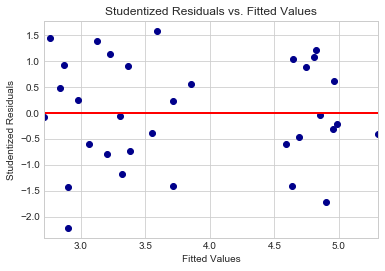

In [47]:
plt.scatter(x = model_new.fittedvalues, y = st_resid_new, color = "darkblue")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals")
plt.title("Studentized Residuals vs. Fitted Values")
plt.hlines(y = 0, xmin = np.min(model_new.fittedvalues), xmax = np.max(model_new.fittedvalues), color = "red", linewidth = 2)
plt.xlim(np.min(model_new.fittedvalues), np.max(model_new.fittedvalues))
plt.show()

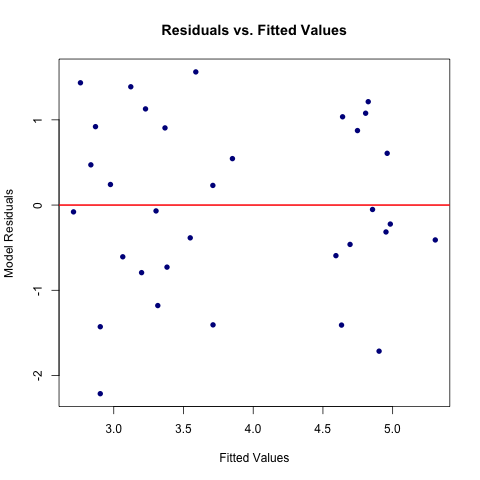

In [48]:
%%R
plot(x = model_new$fitted.values, y = st_resid_new, col = "darkblue", pch = 16, xlab = "Fitted Values", ylab = "Model Residuals", main = "Residuals vs. Fitted Values")
abline(h = 0, col = "red", lwd = 2)

The variance appears far more stable after the transformation of the response variable.  Accordingly, we would prefer to use this log-transformed model in part H.  Moreover, the R-squared and F-statistics are slightly higher in the log-transformed model which is preferable. 